<a href="https://colab.research.google.com/github/Suravam/tutorial/blob/main/dswp/MNIST_And_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This workbook intended to walk through different datasets available within sci-kit learn and various features of Numpy that comes handy to manipulate those datasets.

1. MNIST Dataset

American Census Bureau employees and few High Schools kids were asked to write numbers '0' to '9' on paper. Those handwritten numbers were captured as back and white images of 784 pixels (28X28). Overall there are 70000 images in this dataset.

In [ ]:
from keras.datasets import mnist

The dataset is added with wrapper code in Python that makes us access the data easily. Let us see the function.

**load_data** : This function return the dataset in following format,

Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).

So, there are two tuples returned and each tuple has two elements.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Now, the data is downloaded and assigned to those variables we placed. Let us check the data.

In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


All the returned data are stored in multi-dimentional Numpy Array. Let us take the X_train array and see how those handwritten digits are stored.

In [ ]:
X_train.shape

(60000, 28, 28)

Imagine a book of 60,000 pages where each page has one handwritten image of a digit. And size of each page is 28x28. This is how the dataset is arranged.

It is a 3D data set. (Like a book)

Let's see the first page.

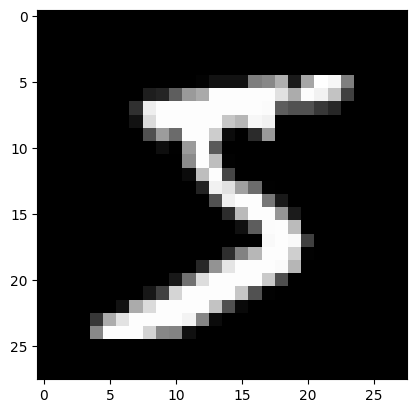

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
plt.show()

It looks like the digit 5 (for me!!!). What is actually written in this image? To answer this we have y_train data. y_train is a 1D array of 60,000 items. Each element in that array indicates the actual digits written in the X_train data.

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

We are correct in detecting that image as '5'. 👍

Can we filter some 10 different images of 6 from the dataset?
What do we need for that?
We need the exact indexes of the digit 5 in the X_train ndarray. To help with this we have y_train array.

Let us print the first 10 indexes of digit 5 from y_train and use those indexes to print the images from X_train.

In [ ]:
y_train == 5

array([ True, False, False, ...,  True, False, False])

Since we asked if the digit is 5. The return value has 60000 items containing boolean answer for our question. That is, whichever position had 5 those are marked as True.

Let us try to retrive 5s from X_train now.

In [ ]:
len(X_train[y_train == 5])

5421

So, we have about 5421 entries/images for the number 5

In [ ]:
X_train[y_train == 5][:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

That is how our 5 looks like in numbers. Let us print first 10 5s.

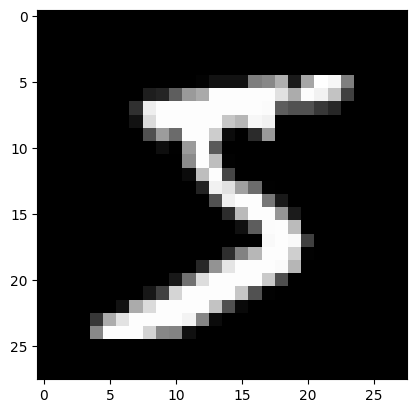

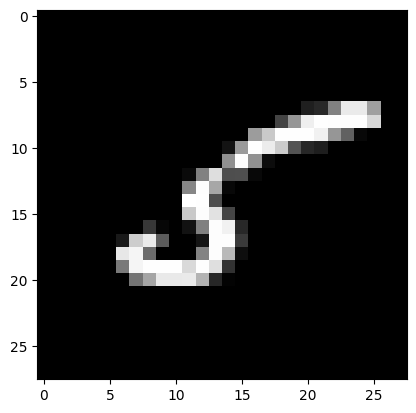

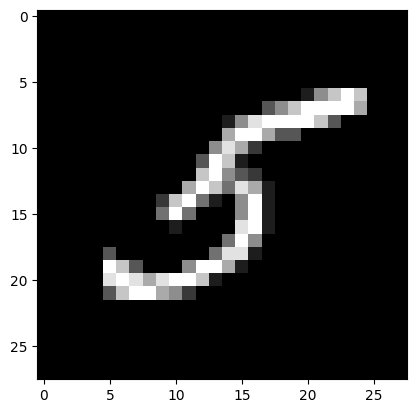

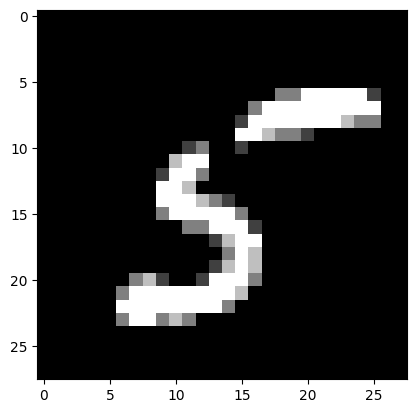

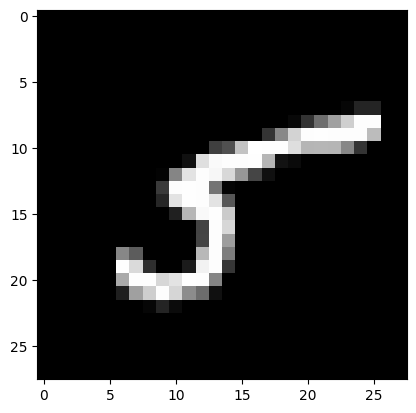

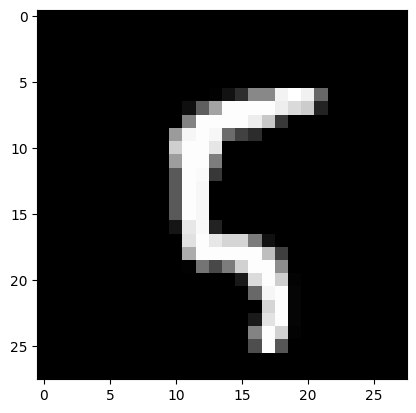

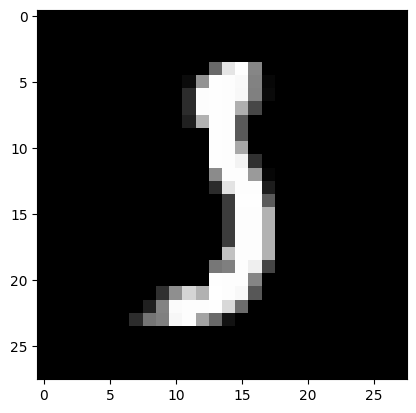

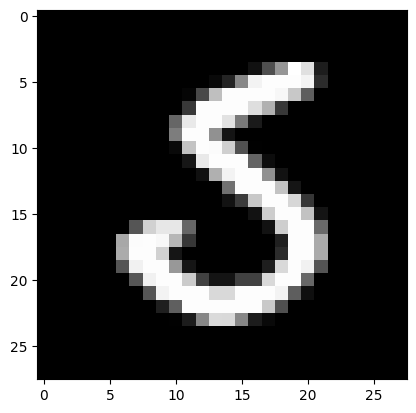

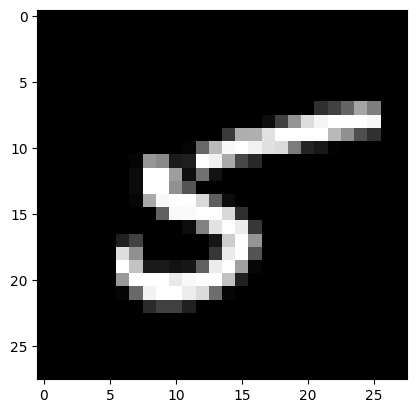

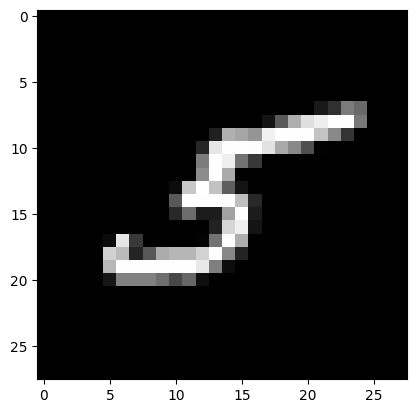

In [ ]:
import matplotlib.pyplot as plt
X = X_train[y_train == 5][:10]
for item in X:
  plt.imshow(item, cmap='gray')
  plt.show()

Hah!! Now we know how to utilize the indexes of Numpy arrays for MNIST dataset.

In [ ]:
X.shape

(10, 28, 28)

Let's think for a moment. The color **black** is indicated by number 0 and **white** is indicated by number 255. In between are different shades of grey. Here, to write the number 1 we may use less white pixels compared to writing a number 9. So, the average value held in pixel will be higher for 9 and lesser for 1. (Just for intuition sake! Not necessarily a fact!!)

Hence, to detect and classify these images mean or average seems like an important feature? May be or May not be.

Anyway, without using Numpy how we could calculate mean of one image?

In [ ]:
X[0].mean()

35.108418367346935

Let's play some more.

What if we want to flip the image? Like as if we're seeing it on the mirror?

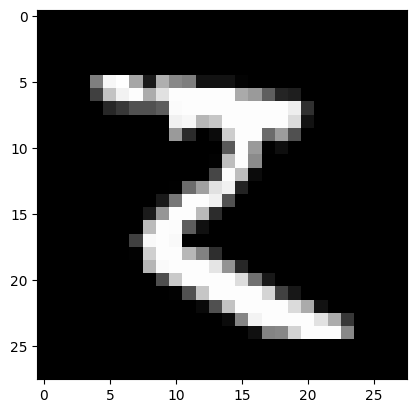

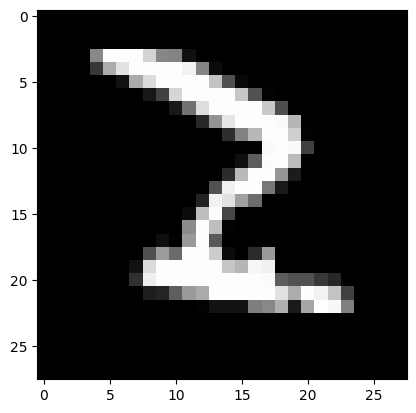

In [ ]:
col_rev = X[0][:, ::-1] # To reverse column
row_rev = X[0][::-1, :] # To reverse rows
plt.imshow(col_rev, cmap='gray')
plt.show()

plt.imshow(row_rev, cmap='gray')
plt.show()

Let us see the original pic again

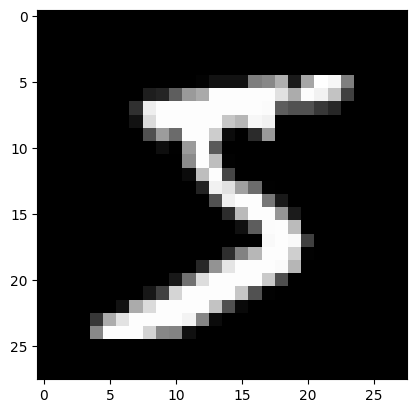

In [ ]:
import numpy as np
plt.imshow(X[0], cmap='gray')
plt.show()

Pixels at first row became last and so on. We can reverse a ndarray with [::-1] notation

What do we see when we make rows as colomns?

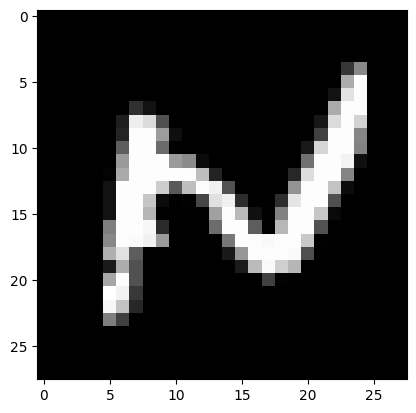

In [ ]:
plt.imshow(X[0].T, cmap='gray')
plt.show()

As we know transpose is matrix operation in which the rows are transposed as columns or vice versa.

What of we want to create multiple images from existing image.
The below code reshapes the image of 784 pixel into images of 196 pixels.
Note: It does does not split the images into 4 pieces. Instead it took the first 196 pixels from first 7 rows.

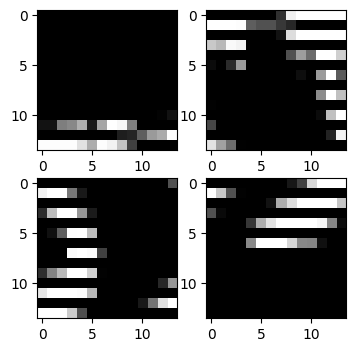

In [ ]:
torn = X[0].reshape(-1, 14, 14)
fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for ax, piece in zip(axes.ravel(), torn):
  ax.imshow(piece, cmap='gray')
plt.show()

What if I want to tear those images into 4 equal pieces?

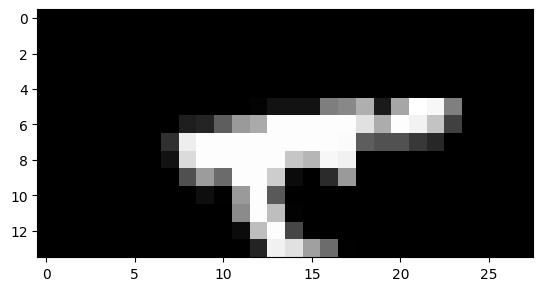

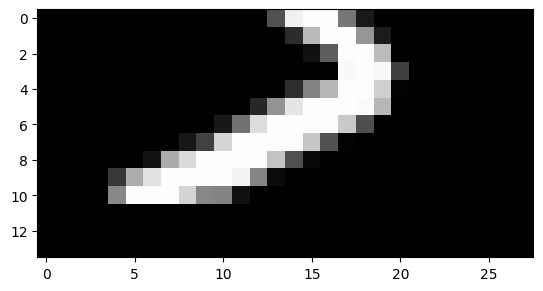

In [ ]:
top, bottom = np.vsplit(X[0], 2)

plt.imshow(top, cmap='gray', vmin = 0, vmax = 255)
plt.show()

plt.imshow(bottom, cmap='gray', vmin = 0, vmax = 255)
plt.show()

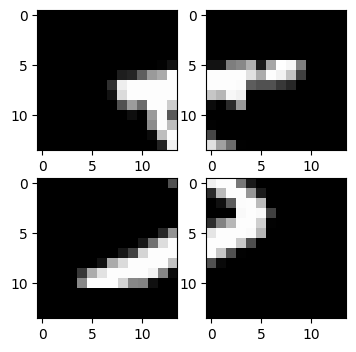

In [ ]:
one , two = np.hsplit(top, 2)
three, four = np.hsplit(bottom, 2)

fig, axes = plt.subplots(2, 2, figsize=(4, 4))

for ax, piece in zip(axes.ravel(), [one, two, three, four]):
  ax.imshow(piece, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Yay!

Let us make a bigger image by sticking four images together!


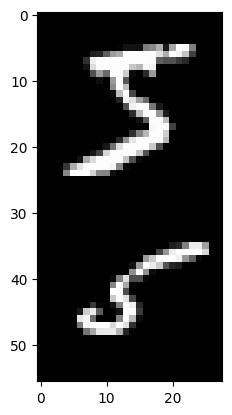

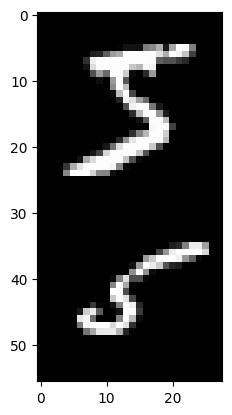

In [ ]:
largeimg = np.concatenate((X[0], X[1]), axis=0)
plt.imshow(largeimg, cmap='gray', vmin = 0, vmax = 255)
plt.show()

largeimg = np.vstack((X[0], X[1]))
plt.imshow(largeimg, cmap='gray', vmin = 0, vmax = 255)
plt.show()

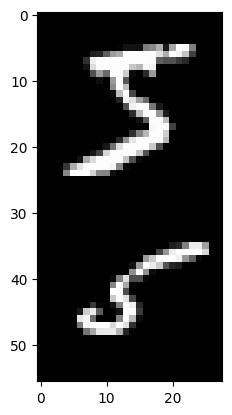

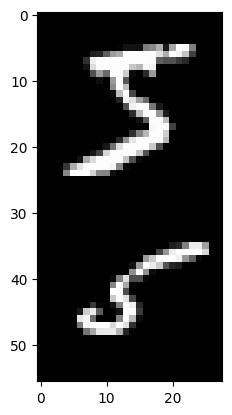

In [ ]:
largeimg1 = np.concatenate((X[2], X[3]), axis=1)
plt.imshow(largeimg, cmap='gray', vmin = 0, vmax = 255)
plt.show()

largeimg2 = np.hstack((X[2], X[3]))
plt.imshow(largeimg, cmap='gray', vmin = 0, vmax = 255)
plt.show()

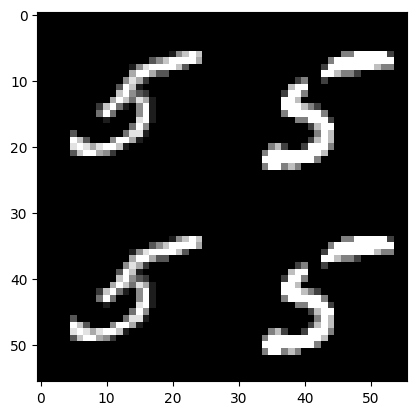

In [ ]:
largeimg = np.vstack((largeimg1, largeimg2))
plt.imshow(largeimg, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Yay!

Now, what if I want to brighten this image?

Basically, we can do this with following steps,
1. Pick up an item and some scalar value say 100
2. If the result is greater than 255. Make the item value as 255

Now each pixel should be lit up by 100!

In [ ]:
import numpy as np

def brighten(pixel):
  bright = pixel + 100
  if bright > 255:
    return 255
  return bright

lighter = np.vectorize(brighten)

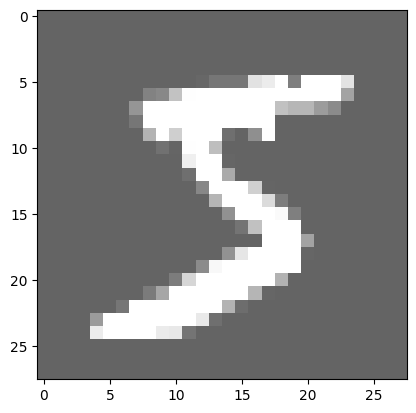

In [ ]:
limg = lighter(X[0])
plt.imshow(limg, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Few stuff to note here.

If we had to do the same operation without Numpy then it would have costed us looping over each element.

But here, Numpy has efficiently performed element-wise operations without any explicit looping. This is because the operation is **broadcasted** to entire array.

Here, we have defined a scalar function called "brighten" then vectorized it using **np.vectorize**. Then we applied it to entire matrix of pixels.

In [ ]:
# Applying PCA over first 100 images of 5

X100 = X_train[y_train == 5][:100]
data = X100.reshape(100, 784)
datac = data - data.mean(axis=0)
datac.shape

(100, 784)

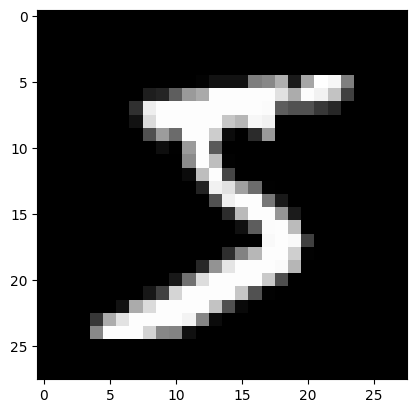

In [ ]:
plt.imshow(data[0].reshape(28, 28), cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
datacov = np.cov(datac, rowvar = False)
eigenvalues, eigenvectors = np.linalg.eigh(datacov)

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
num_components = 100
pca_components = eigenvectors[:, :num_components]

In [ ]:
a = pca_components[:, 1]
a.shape
pca_components.shape

(784, 100)

In [ ]:
projections = np.array([0 for i in range(78400)]).reshape(784, 100)
for i in range(num_components):
  pc = pca_components[:, i].reshape(784, 1)
  step1 = (datac).dot(pc)
  proj = np.dot(pc, step1.T)
  projections = projections + proj


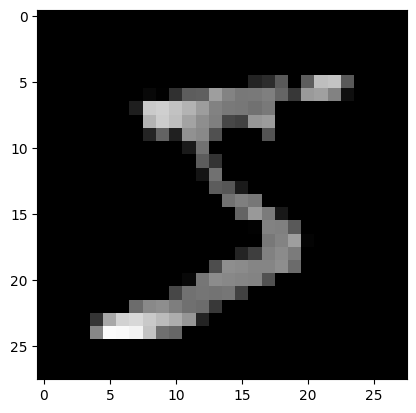

In [ ]:
plt.imshow(projections.T[0].reshape(28, 28), cmap='gray', vmin = 0, vmax = 255)
plt.show()